# Grid Environment Experiments

Referenced Work: [Russek et al., 2017](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005768).

In [1]:
# Uncomment below lines and run this cell to install neuronav and requirements for colab.

#!git clone https://github.com/awjuliani/neuro-nav
#!pip install ./neuro-nav[experiments_remote]

In [2]:
from neuronav.envs.grid_env import GridEnv, GridSize, GridObsType
from neuronav.agents.td_agents import TDSR, TDQ
from neuronav.agents.dyna_agents import DynaQ, DynaSR
from neuronav.agents.mb_agents import MBV
from neuronav.envs.grid_topographies import GridTopography
from neuronav.utils import run_episode
from neuronav.notebook_helpers import plot_grid_experiment_results

%config InlineBackend.figure_format = 'retina'

### Reward Transfer Experiment

The goal location changes from the left to the right arm of the T-maze 75 episodes into the training procedure.

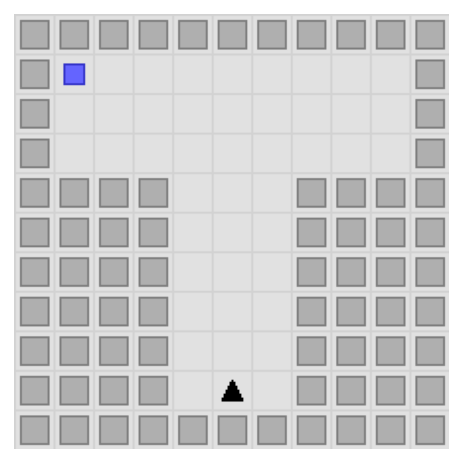

In [4]:
num_eps = 150
max_steps = 100
num_reps = 5

agent_types = [TDQ, TDSR, DynaSR, MBV]

env = GridEnv(
    topography=GridTopography.t_maze,
    grid_size=GridSize.small,
    obs_type=GridObsType.index,
)
env.reset()
grid = env.render()
results = {}

for h in range(num_reps):
    for agent_type in agent_types:
        agent = agent_type(
            env.state_size, env.action_space.n, lr=1e-1, poltype="softmax", beta=1e3
        )
        tot_steps = []
        for i in range(num_eps):
            if i > num_eps // 2:
                use_goal = (1, env.grid_size - 2)
            else:
                use_goal = (1, 1)
            agent, steps, _ = run_episode(
                env, agent, max_steps, objects={"rewards": {use_goal: 1.0}}
            )
            tot_steps.append(steps)
        if str(agent_type.__name__) in results.keys():
            results[str(agent_type.__name__)].append(tot_steps)
        else:
            results[str(agent_type.__name__)] = [tot_steps]

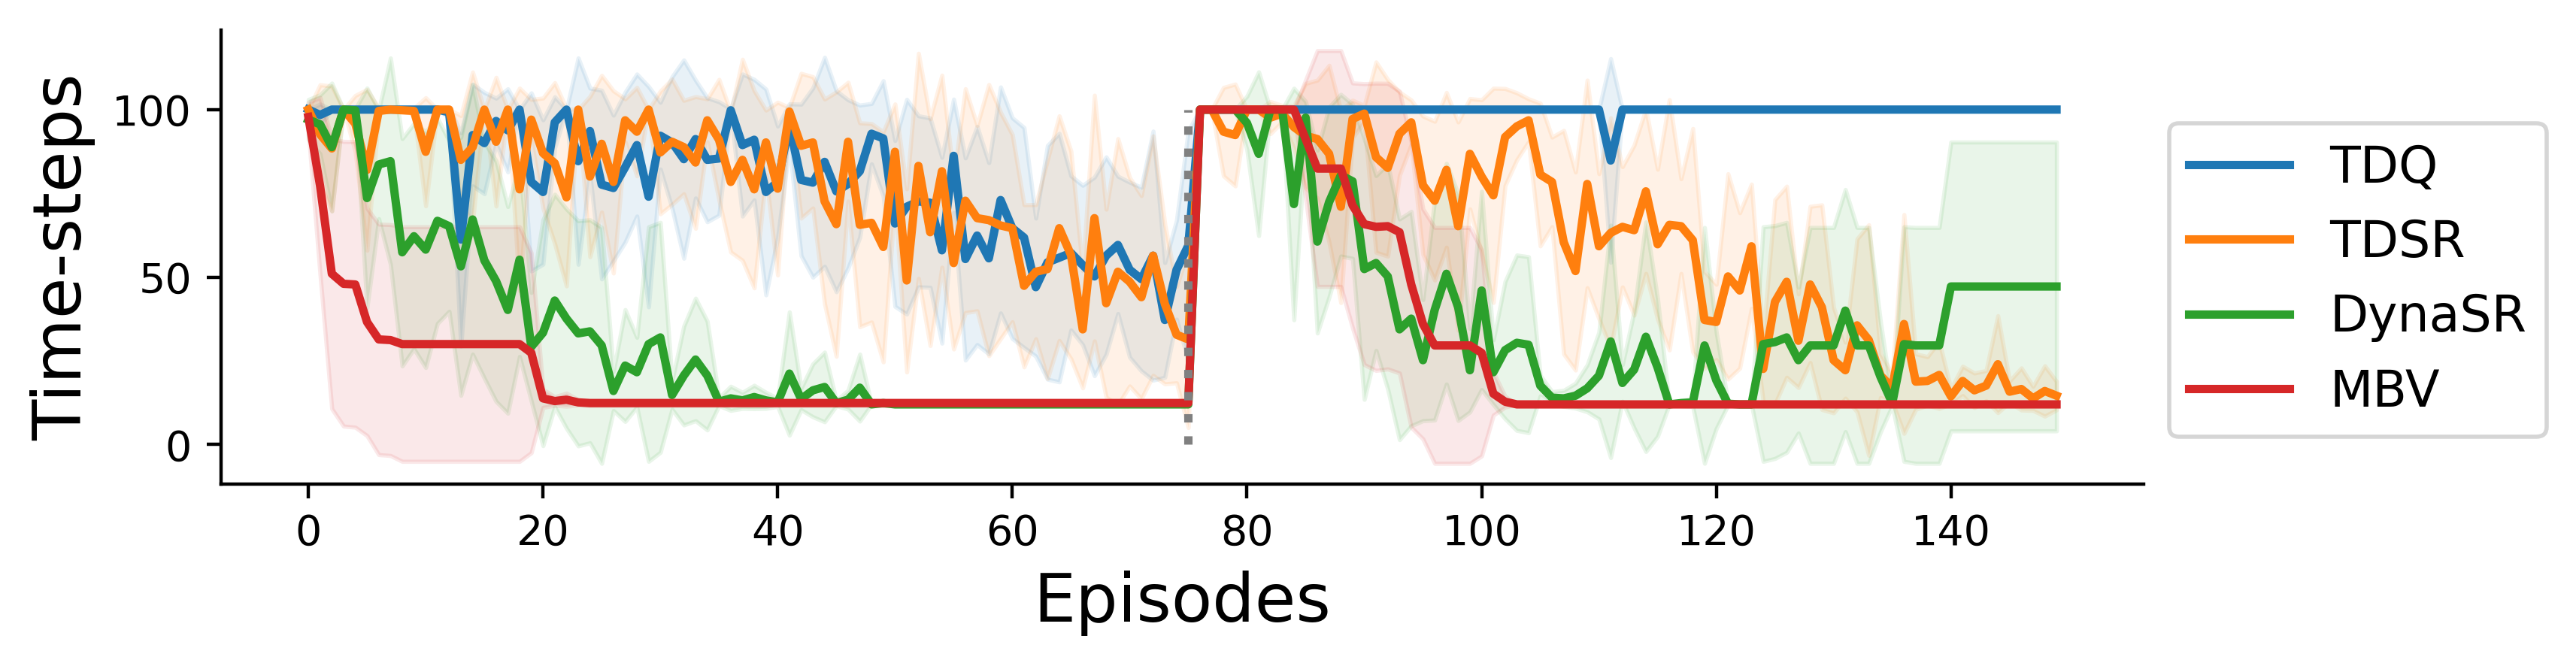

In [5]:
plot_grid_experiment_results(results, num_eps)

### Structure Transfer Experiment

A roadblock is introduced into the environment 50 episodes into the training procedure.

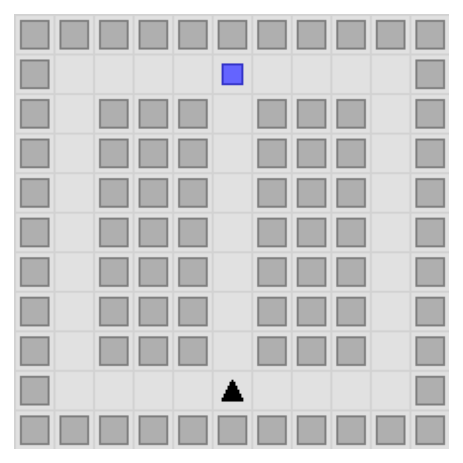

In [6]:
num_eps = 100
max_steps = 100
num_reps = 5

agent_types = [TDQ, DynaQ, DynaSR, MBV]

env = GridEnv(
    topography=GridTopography.detour,
    grid_size=GridSize.small,
    obs_type=GridObsType.index,
)
env.reset()
grid = env.render()

results = {}

for h in range(num_reps):
    for agent_type in agent_types:
        agent = agent_type(
            env.state_size, env.action_space.n, lr=1e-1, poltype="softmax", beta=1e3
        )
        tot_steps = []
        env = GridEnv(
            topography=GridTopography.detour,
            grid_size=GridSize.small,
            obs_type=GridObsType.index,
        )
        for i in range(num_eps):
            if i > num_eps // 2:
                env = GridEnv(
                    topography=GridTopography.detour_block,
                    grid_size=GridSize.small,
                    obs_type=GridObsType.index,
                )
            agent, steps, _ = run_episode(env, agent, max_steps)
            tot_steps.append(steps)
        if str(agent_type.__name__) in results.keys():
            results[str(agent_type.__name__)].append(tot_steps)
        else:
            results[str(agent_type.__name__)] = [tot_steps]

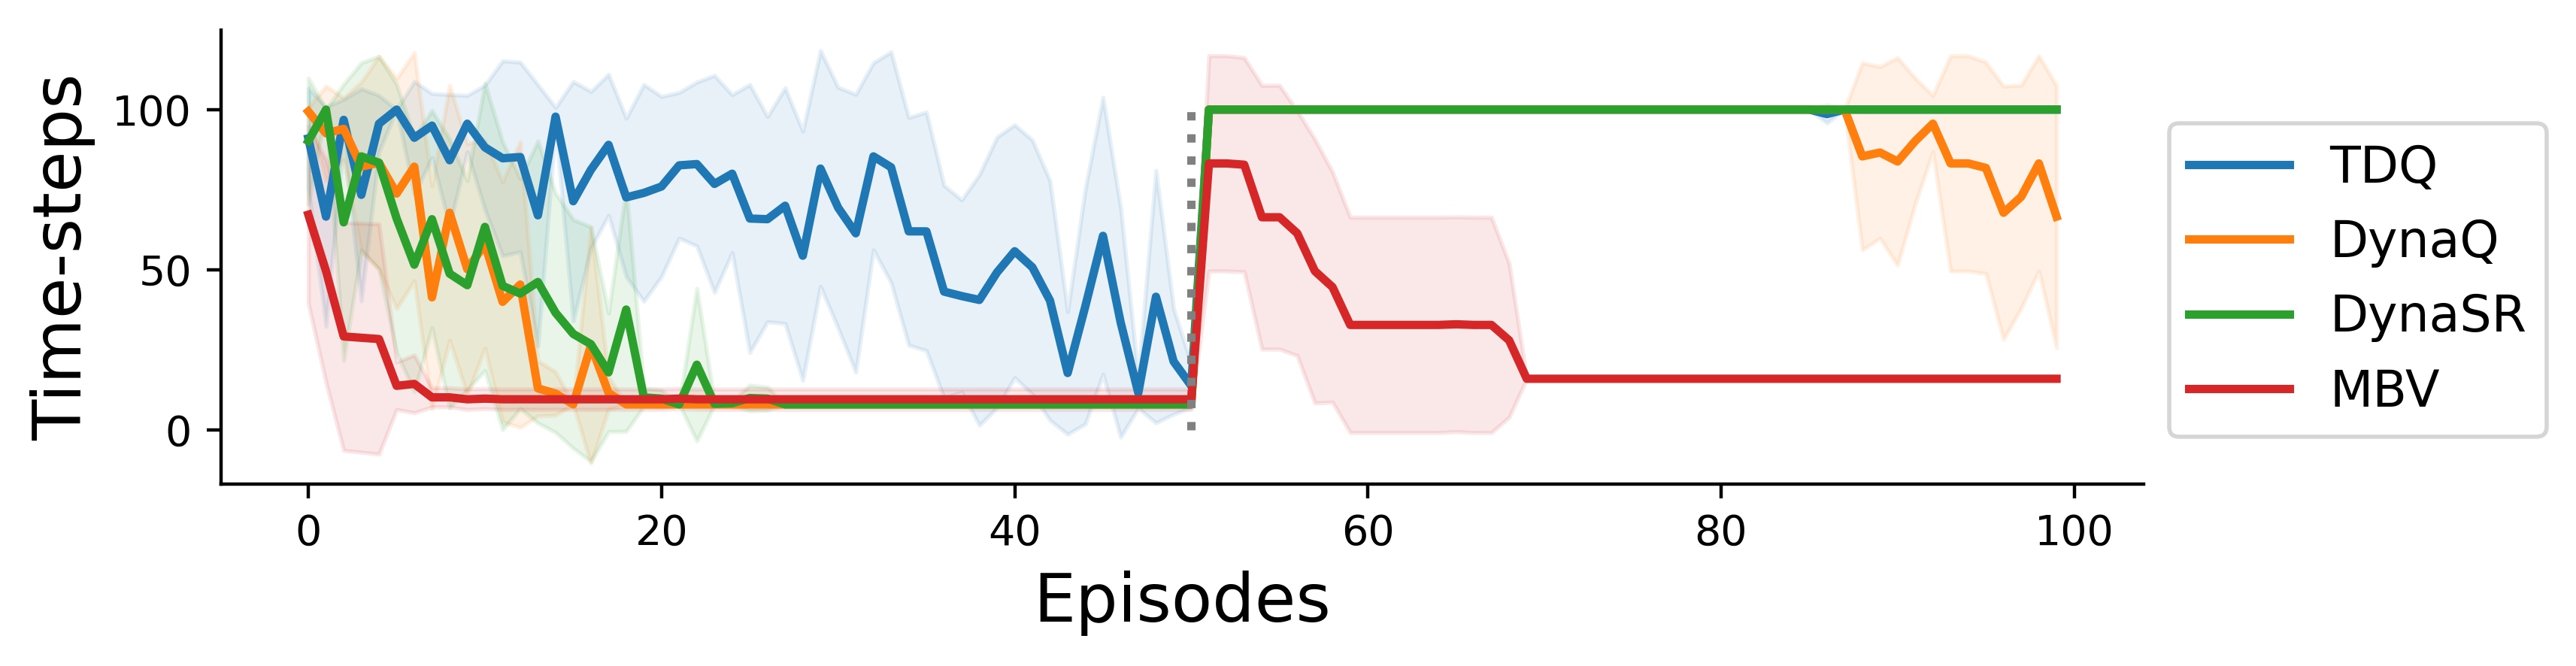

In [7]:
plot_grid_experiment_results(results, num_eps)